In [122]:
import pandas as pd
pd.set_option('display.max_columns', None)
from plotnine import *

from mizani.breaks import date_breaks
from mizani.formatters import date_format

from tqdm.auto import tqdm
tqdm.pandas()
import requests
import re

## This is a dataset of prices of specific food items in Nigeria from January 2017 to December 2021.

In [341]:
df = pd.read_excel('Nigfoodprices.xlsx')
df.head()

,ItemLabels,Jan_17,Jun_17,Dec_17,Jan_18,Jun_18,Dec_18,Jan_19,Jun_19,Dec_19,Jan_20,Jun_20,Dec_20,Jan_21,Jun_21,Dec_21
0,Agric eggs medium size,512.988359,514.655959,494.430636,437.127646,539.751512,466.965382,469.858035,495.326018,457.800231,454.173582,472.825896,499.550834,510.839763,556.465975,635.162676
1,Agric eggs(medium size price of one),47.418103,45.277478,41.323472,38.847455,41.380713,42.579136,42.182421,39.307768,40.716587,40.171856,42.176444,45.396387,46.208117,51.217547,57.796100
2,Beans brown,353.604172,374.255115,361.973039,385.526791,418.784551,386.776909,382.763471,342.823953,299.480089,285.610367,289.888948,336.235095,337.088451,471.238039,494.828379
3,Beans white,305.530515,339.643059,314.925927,344.515236,369.428601,344.720405,336.723299,311.403139,281.596490,268.797654,259.385977,309.071573,316.916244,431.792443,480.793500
4,Beef Bone in,1001.242821,1129.018002,1067.730547,1045.554721,1034.566009,997.726455,994.204579,1003.195294,1045.858321,1031.531739,1069.852857,1083.143607,1091.822936,1220.333131,1385.963469


## Let's check how many rows there are

In [342]:
df.shape

(43, 16)

## Obviously I don't want to plot the entire 43 rows. So, I need to strip down the dataframe to only the food items I am interested in and also reduce the columns further

In [343]:
df = df.round(1)
df.head()

,ItemLabels,Jan_17,Jun_17,Dec_17,Jan_18,Jun_18,Dec_18,Jan_19,Jun_19,Dec_19,Jan_20,Jun_20,Dec_20,Jan_21,Jun_21,Dec_21
0,Agric eggs medium size,513.0,514.7,494.4,437.1,539.8,467.0,469.9,495.3,457.8,454.2,472.8,499.6,510.8,556.5,635.2
1,Agric eggs(medium size price of one),47.4,45.3,41.3,38.8,41.4,42.6,42.2,39.3,40.7,40.2,42.2,45.4,46.2,51.2,57.8
2,Beans brown,353.6,374.3,362.0,385.5,418.8,386.8,382.8,342.8,299.5,285.6,289.9,336.2,337.1,471.2,494.8
3,Beans white,305.5,339.6,314.9,344.5,369.4,344.7,336.7,311.4,281.6,268.8,259.4,309.1,316.9,431.8,480.8
4,Beef Bone in,1001.2,1129.0,1067.7,1045.6,1034.6,997.7,994.2,1003.2,1045.9,1031.5,1069.9,1083.1,1091.8,1220.3,1386.0


In [423]:
df2['Jan_18'] = df2['Jan_18'].astype(float)

In [424]:
df2 = df2.round(1)

## I decided to clean the dataframe a bit more by saving it and manually removing the first row in excel.


In [426]:
df2.to_excel('Myfood.xlsx')

In [1052]:
df2 = pd.read_excel('Myfood.xlsx')

In [1053]:
df2.head()

,ItemLabels,Jan_17,Jun_17,Dec_17,Jan_18,Jun_18,Dec_18,Jan_19,Jun_19,Dec_19,Jan_20,Jun_20,Dec_20,Jan_21,Jun_21,Dec_21
0,Agric eggs(medium size price of one),47.4,45.3,41.3,38.8,41.4,42.6,42.2,39.3,40.7,40.2,42.2,45.4,46.2,51.2,57.8
1,Beans brown,353.6,374.3,362.0,385.5,418.8,386.8,382.8,342.8,299.5,285.6,289.9,336.2,337.1,471.2,494.8
2,Beans white,305.5,339.6,314.9,344.5,369.4,344.7,336.7,311.4,281.6,268.8,259.4,309.1,316.9,431.8,480.8
3,Beef Bone in,1001.2,1129.0,1067.7,1045.6,1034.6,997.7,994.2,1003.2,1045.9,1031.5,1069.9,1083.1,1091.8,1220.3,1386.0
4,Beef boneless,1249.5,1393.4,1236.4,1298.7,1271.5,1270.8,1274.0,1240.4,1292.5,1289.8,1317.0,1405.7,1421.1,1567.3,1846.4


In [1054]:
df2 = pd.melt(df2, id_vars=['ItemLabels'], value_name='price', var_name='date')


In [1055]:
df2.tail(100)

,ItemLabels,date,price
530,Mudfish dried,Jan_21,1758.2
531,Onion bulb,Jan_21,356.3
532,Palm oil (bottle),Jan_21,564.3
533,Plantain ripe,Jan_21,230.3
534,Plantain unripe,Jan_21,212.3
...,...,...,...
625,Titus frozen,Dec_21,1463.6
626,Tomato,Dec_21,357.0
627,Vegetable oil (bottle),Dec_21,896.4
628,Wheat (golden penny 2kg),Dec_21,967.5


In [1056]:
df2['date'] = df2.date.str.replace('_', '-')

## To make it plotable with sequencial dates, I converted the date column to datetime

In [1057]:
df2['date'] = pd.to_datetime(df2['date'], format="%b-%y")

In [1058]:
df2.head()

,ItemLabels,date,price
0,Agric eggs(medium size price of one),2017-01-01,47.4
1,Beans brown,2017-01-01,353.6
2,Beans white,2017-01-01,305.5
3,Beef Bone in,2017-01-01,1001.2
4,Beef boneless,2017-01-01,1249.5


In [1059]:
df2 = df2.rename(columns={'ItemLabels': 'items'})

In [1061]:
df2.head(50)

,items,date,price
0,Agric eggs(medium size price of one),2017-01-01,47.4
1,Beans brown,2017-01-01,353.6
2,Beans white,2017-01-01,305.5
3,Beef Bone in,2017-01-01,1001.2
4,Beef boneless,2017-01-01,1249.5
5,Bread sliced 500g,2017-01-01,302.9
6,Bread unsliced 500g,2017-01-01,270.3
7,Ofada,2017-01-01,377.4
8,Catfish fresh,2017-01-01,899.6
9,Catfish dried,2017-01-01,2204.1


In [1040]:
df2.groupby('items').price.pct_change().sort_values(ascending=False).head(10)



489    0.596055
136    0.529482
80     0.515152
111    0.448324
59     0.437158
120    0.417319
547    0.397805
95     0.388088
83     0.386990
60     0.386239
Name: price, dtype: float64

## I decided to choose my 5 favorite food

In [778]:
df3 = df2[df2['items'].isin(['Beans brown','Beef Bone in', 'Chicken Wings', 'Ofada', 'Plantain ripe', 'Yam'])]


In [1063]:
df3.head()

,items,date,price
1,Beans brown,2017-01-01,353.6
3,Beef Bone in,2017-01-01,1001.2
7,Ofada,2017-01-01,377.4
12,Chicken Wings,2017-01-01,919.1
29,Plantain ripe,2017-01-01,234.2


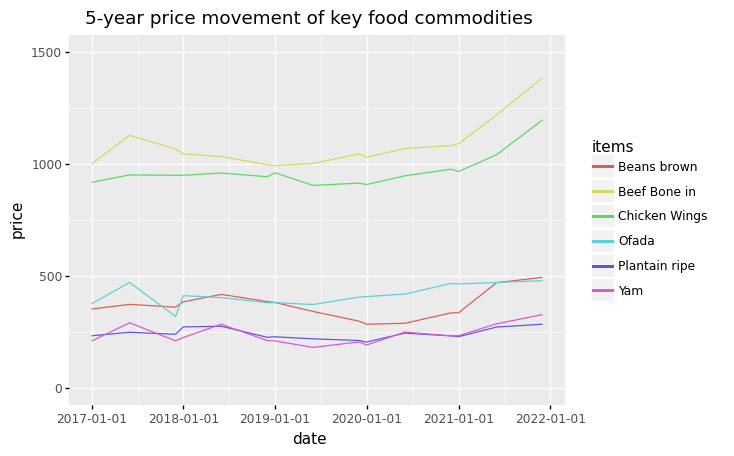

<ggplot: (681972402)>

In [1073]:
# price_movement =
(
    ggplot(df3)
    + aes(x='date', y='price', color='items')
    + geom_line()
#     + geom_point(size=1)
    + coord_cartesian(ylim=[0, 1500])
    + theme_gray()
#     + theme_bw()
    + labs(title = '5-year price movement of key food commodities', 
            subtitle = 'These food items represent common food items in different parts of Nigeria')
)
# price_movement.save('price_movement.png')

## How about we look at different sets of food?

In [1074]:
df3_1 = df2[df2['items'].isin(['Titus frozen','Vegetable oil (bottle)', 'Maize grain white', 'Onion bulb', 'Irish potato', 'Bread sliced 500g'])]


In [1075]:
df3_1.head()

,items,date,price
5,Bread sliced 500g,2017-01-01,302.9
21,Irish potato,2017-01-01,300.9
23,Maize grain white,2017-01-01,167.1
27,Onion bulb,2017-01-01,258.9
37,Titus frozen,2017-01-01,884.8


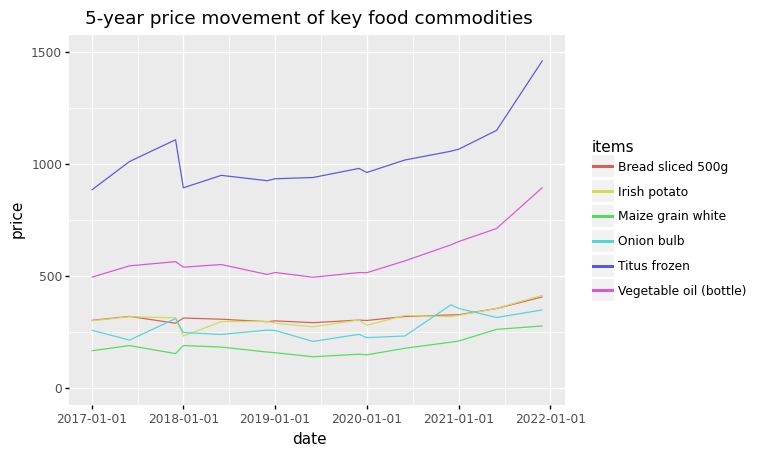

<ggplot: (681978811)>

In [1078]:
#price_movement2 =
(
    ggplot(df3_1)
    + aes(x='date', y='price', color='items')
    + geom_line()
#     + geom_point(size=1)
    + coord_cartesian(ylim=[0, 1500])
    + theme_gray()
#     + theme_bw()
    + labs(title = '5-year price movement of key food commodities', 
            subtitle = 'These food items represent common food items in different parts of Nigeria')
)
# price_movement2.save('price_movement.png')

## Beans, Beef and Catfish are the commodities with the highest prices increases. Which states produce this items and what is the security situation like according to our violence heat map?

** Just to be sure, let's take another 6 different food commodities and map their increase

In [645]:
df3_1 = df2[df2['items'].isin(['Maize grain white','Onion bulb', 'Beans white'])]

df3_1.head()

,items,date,price
23,Maize grain white,2017-01-01,167.1
27,Onion bulb,2017-01-01,258.9
65,Maize grain white,2017-06-01,190.3
69,Onion bulb,2017-06-01,214.8
107,Maize grain white,2017-12-01,154.4


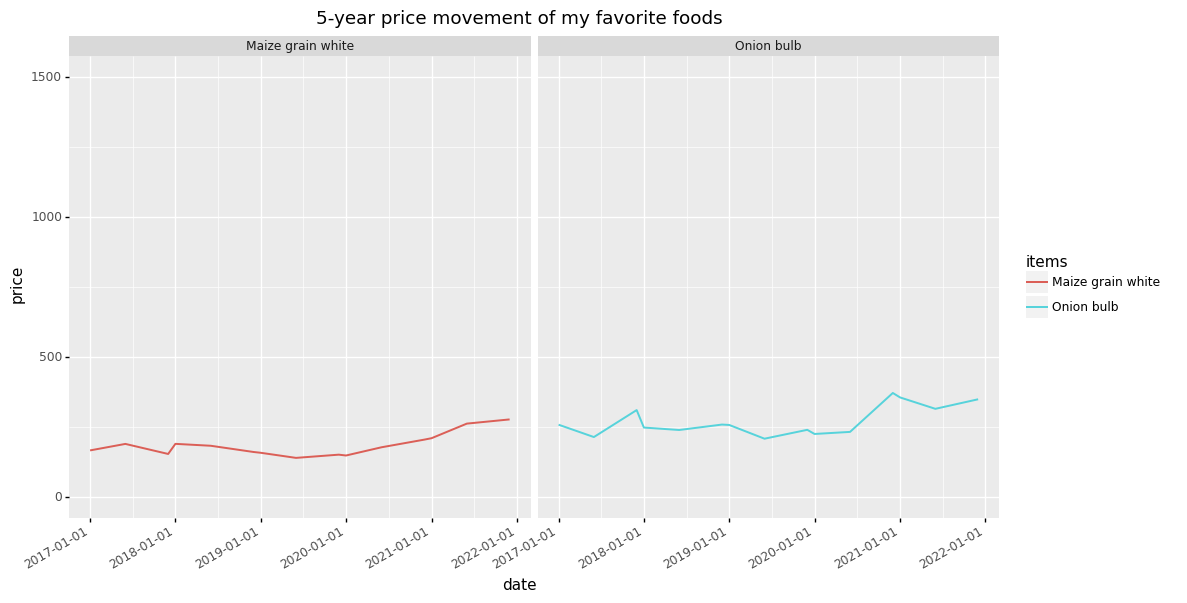

<ggplot: (680643325)>

In [647]:
(
    ggplot(df3_1)
    + aes(x='date', y='price', color='items')
    + geom_line(size=0.8)
    + facet_wrap('~items')
    + labs(title='5-year price movement of my favorite foods')
    + coord_cartesian(ylim=[0, 1500])
    + theme(figure_size=(12, 6))
    + theme(axis_text_x=element_text(angle=30, hjust=1))
)

## Then I read in my second dataset which gives average prices of the same items in each state of Nigeria

In [448]:
df4 = pd.read_excel('original_datalocation.xlsx')
pd.set_option('display.max_columns', None)
df4.head()

,Items,Abia,Abuja,Anambra,Ebonyi,Enugu,Imo,A_Ibom,Bayelsa,C_River,Delta,Rivers,Edo,Adamawa,Bauchi,Borno,Gombe,Benue,Taraba,Yobe,Kogi,Kwara,Nasarawa,Niger,Plateau,Ekiti,Lagos,Ondo,Ogun,Osun,Oyo,Jigawa,Kaduna,Kano,Katsina,Kebbi,Zamfara,Sokoto
0,Agric eggs medium size,701.058957,700.681947,724.795647,726.216873,747.516429,690.578571,749.660357,800.400000,756.857004,782.578687,744.605217,797.883750,429.518000,424.864440,413.313333,417.689320,460.295385,449.136640,452.520625,444.732330,438.168889,450.691636,448.060160,451.581818,742.777778,763.333333,785.000000,715.000000,635.555556,703.157895,716.666667,747.555556,771.428571,730.769231,647.368421,670.000000,669.000000
1,Agric eggs(medium size price of one),63.390333,60.036000,62.276190,61.048800,62.431200,61.929447,62.617007,70.035000,63.951391,68.314838,62.874646,67.905000,43.850000,44.245800,42.000000,44.006625,44.343333,41.429474,41.927818,43.796200,42.755000,42.838560,43.720770,42.747273,69.411765,73.181818,70.421053,68.571429,62.823529,65.777778,62.333333,61.428571,64.285714,66.250000,62.500000,65.000000,62.000000
2,Beans brown,765.857956,703.248279,904.794887,892.230857,854.712857,729.314878,621.056171,603.458679,617.456499,633.769412,642.753623,600.277778,337.846968,234.520000,252.929231,315.228571,341.846268,269.335311,255.860204,339.212557,362.505286,279.561361,291.517097,336.399475,460.012987,449.633324,504.902635,511.213382,543.894737,688.195187,411.111111,423.662017,418.714286,375.000000,358.441558,464.285714,513.888889
3,Beans white,760.522929,606.155409,880.989200,888.565223,783.952220,652.185949,528.835630,555.563719,603.426604,593.159422,631.372619,567.376494,254.809425,240.000000,257.923516,281.365585,350.783442,356.079780,288.934892,348.367353,365.169396,322.445824,290.546452,337.614940,500.321102,511.176381,581.145538,543.770492,439.724138,642.301136,276.619048,438.747794,465.014577,305.897436,387.358277,455.026455,496.111111
4,Beef Bone in,1402.824044,1887.687651,1480.072202,1559.769856,1460.184779,1576.354329,1311.266991,1705.404643,1718.942619,1507.732279,1534.831349,1622.108529,1092.500000,977.643333,1052.742857,1210.827555,1195.477143,981.048999,1004.550541,1196.268182,1196.617403,1098.911844,1164.638465,1230.110065,1773.412698,1520.813559,1208.992060,1746.279911,1124.897303,1420.353866,1315.843389,1533.333333,1393.846154,1325.852273,1696.969697,1650.000000,1401.538462


## Again I choose only the food items I worked on prior as my main focus

In [390]:
df4 = df4.loc[[2, 4, 8, 10, 24, 31, 39]]


In [391]:
df4 = df4.T


In [392]:
df4.head()

,2,4,8,10,24,31,39
Items,Beans brown,Beef Bone in,Ofada,Chicken Wings,Yam tuber,Catfish fresh,Plantain ripe
Abia,765.857956,1402.824044,536.963636,1853.593271,443.453157,2016.666667,365.612861
Abuja,703.248279,1887.687651,784.857143,1758.4723,428.073238,1467.375052,429.166667
Anambra,904.794887,1480.072202,482.802245,1623.622319,474.212307,1991.88,488.471395
Ebonyi,892.230857,1559.769856,609.183749,962.599034,420.460969,1569.315125,371.620012


In [393]:
df4.to_excel('MyFood_location.xlsx')

In [1097]:
df4 = pd.read_excel('MyFood_location.xlsx')

df4.head()

,States,Beans brown,Beef Bone in,Ofada,Chicken Wings,Yam tuber,Catfish fresh,Plantain ripe,Zone
0,Abia,765.857956,1402.824044,536.963636,1853.593271,443.453157,2016.666667,365.612861,South
1,Abuja,703.248279,1887.687651,784.857143,1758.472300,428.073238,1467.375052,429.166667,North
2,Anambra,904.794887,1480.072202,482.802245,1623.622319,474.212307,1991.880000,488.471395,South
3,Ebonyi,892.230857,1559.769856,609.183749,962.599034,420.460969,1569.315125,371.620012,South
4,Enugu,854.712857,1460.184779,555.628966,1533.333333,384.240446,1810.628100,416.334429,South


## So I decided to use this magic that I got to learn TOO LATE to change the structure of the dataframe

In [1098]:
df4 = pd.melt(df4, id_vars=['States', 'Zone'], value_name='price', var_name='items')


In [1099]:
df4 = df4.round(1)
df4

,States,Zone,items,price
0,Abia,South,Beans brown,765.9
1,Abuja,North,Beans brown,703.2
2,Anambra,South,Beans brown,904.8
3,Ebonyi,South,Beans brown,892.2
4,Enugu,South,Beans brown,854.7
...,...,...,...,...
254,Kano,North,Plantain ripe,300.0
255,Katsina,North,Plantain ripe,330.8
256,Kebbi,North,Plantain ripe,323.1
257,Zamfara,North,Plantain ripe,248.0


In [1100]:
df4.to_csv('state_price.csv')

In [847]:
df4 = df4.round(1)


## So I wanted to find the most expensive states to find these foods

In [1151]:
catfish_hightest = df4[df4['items'] == 'Catfish fresh'].sort_values(by='price').tail(10)

In [1152]:
catfish_hightest

,States,Zone,items,price
192,Bayelsa,South,Catfish fresh,1546.3
188,Ebonyi,South,Catfish fresh,1569.3
193,C_River,South,Catfish fresh,1633.4
196,Edo,South,Catfish fresh,1755.1
190,Imo,South,Catfish fresh,1776.4
191,A_Ibom,South,Catfish fresh,1807.9
189,Enugu,South,Catfish fresh,1810.6
210,Lagos,South,Catfish fresh,1857.0
187,Anambra,South,Catfish fresh,1991.9
185,Abia,South,Catfish fresh,2016.7


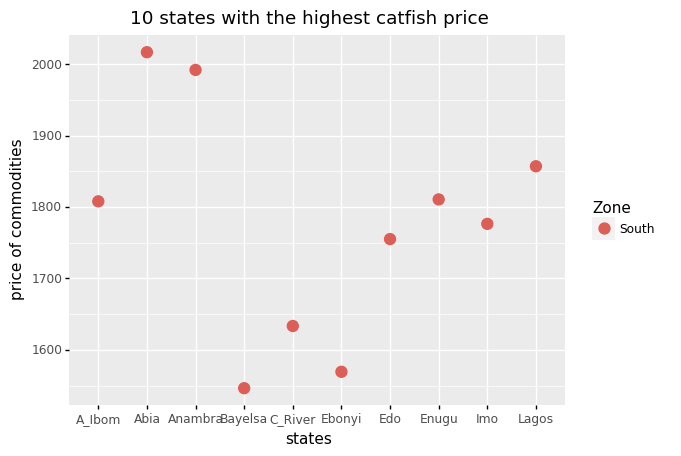

<ggplot: (674699650)>

In [1194]:
# chart6 = 
(
    ggplot(catfish_hightest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest catfish price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart6.save("chart6.png")

In [1156]:
beans_highest = df4[df4['items'] == 'Beans brown'].sort_values(by='price').tail(10)

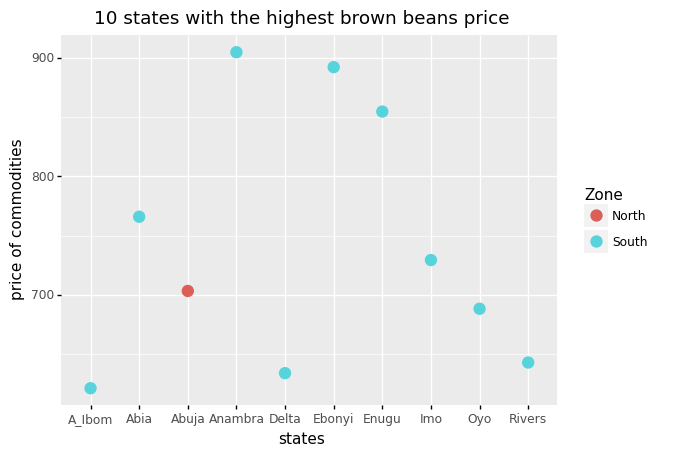

<ggplot: (681705180)>

In [1193]:
# chart5 = 
(
    ggplot(beans_highest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest brown beans price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart5.save("chart5.png")

In [1160]:
beef_highest = df4[df4['items'] == 'Beef Bone in'].sort_values(by='price').tail(10)

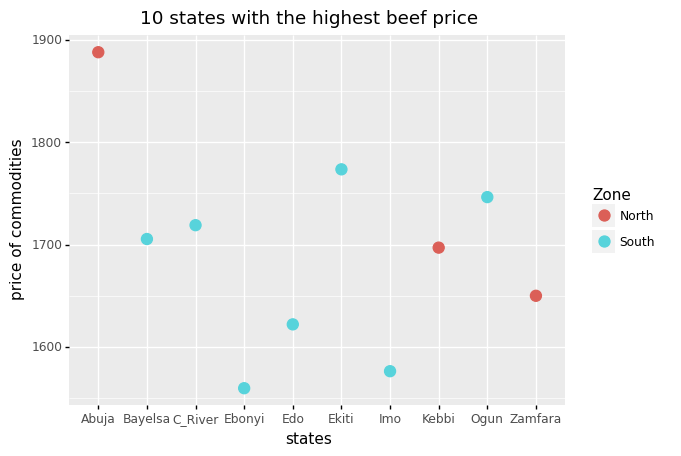

<ggplot: (679339268)>

In [1192]:
# chart4 = 
(
    ggplot(beef_highest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest beef price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart4.save('chart4.png')

In [1162]:
chicken_highest = df4[df4['items'] == 'Chicken Wings'].sort_values(by='price').tail(10)

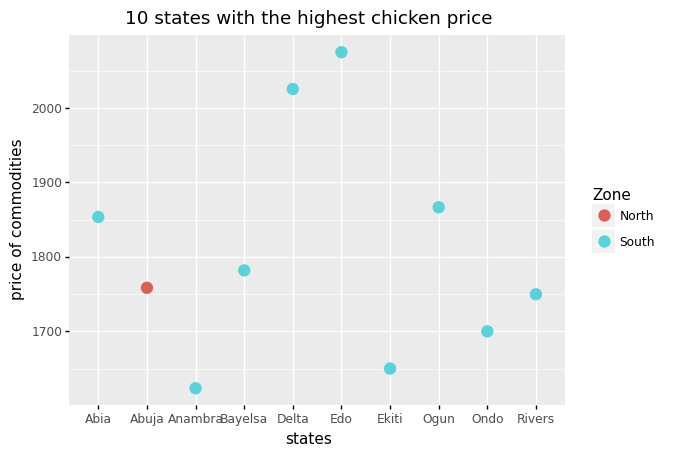

<ggplot: (674367211)>

In [1191]:
#chart3 =
(
    ggplot(chicken_highest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest chicken price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart3.save('chart3.png')

In [1167]:
ofada_highest = df4[df4['items'] == 'Ofada'].sort_values(by='price').tail(10)

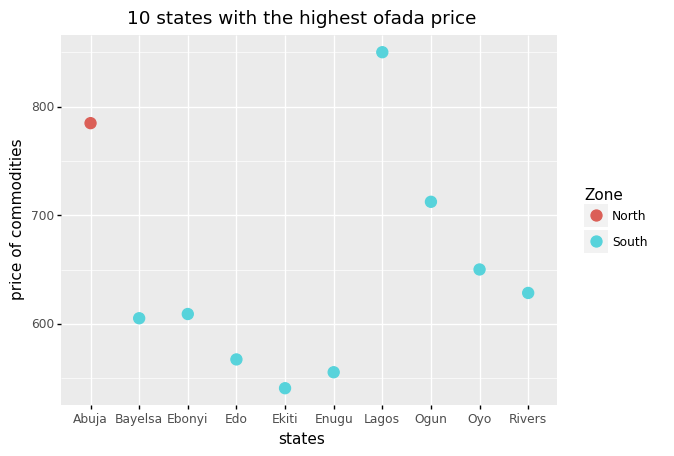

<ggplot: (682173371)>

In [1190]:
#chart2 = 
(
    ggplot(ofada_highest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest ofada price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart2.save('chart2.png')


In [1170]:
yam_highest = df4[df4['items'] == 'Yam tuber'].sort_values(by='price').tail(10)

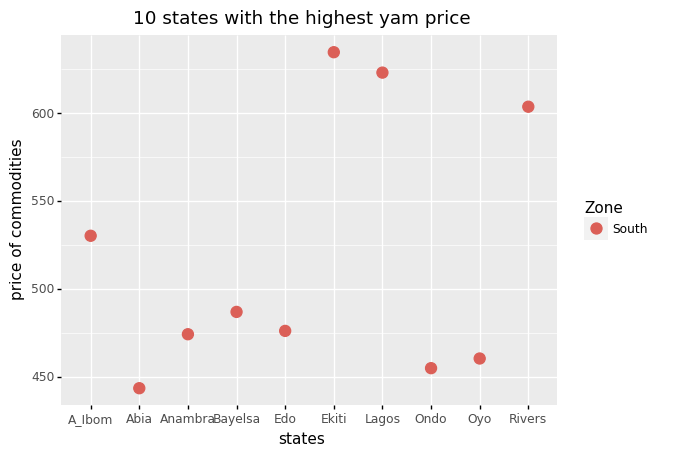

<ggplot: (682243786)>

In [1189]:
# chart1= 
(
    ggplot(yam_highest, aes(x='States', y='price'))
        + geom_point(aes(color='Zone'), size=4)
        + labs(
            title='10 states with the highest yam price',
            y = 'price of commodities',
            x = 'states')

    

)
#chart1.save('chart1.png')

# Read in our dataset of the number of violent attacks across the country since 2011


In [724]:
# https://www.cfr.org/nigeria/nigeria-security-tracker/p29483

# df5 = pd.read_excel("attacks.xlsx", usecols=["Title", "Date", "State", "Total_Deaths", "full place name"])
# pd.set_option('display.max_columns', None)


In [202]:
df5.to_csv("attack_trimmed.xlsx")

In [727]:
states = pd.read_excel('Nigeria_states_coords.xlsx')
attacks = pd.read_csv('attack_trimmed.csv')
# states['state'] = states['state'].astype('string')
# attacks['State'] = attacks['State'].astype('string')

states['state'] = states['state'].str.rstrip()
states['state'].tolist()
# attacks['State'].tolist()
df = pd.merge(attacks, states, how="left", left_on="State", right_on="state")


,Unnamed: 0,Title,Date,State,Total Deaths,full place name,state,latitude,longitude
0,0,Army Barracks Attack Ahead of Goodluck Jonatha...,5/29/11,Bauchi,20.0,"Bauchi, Bauchi, Nigeria",Bauchi,11.680410,10.190013
1,1,Kaduna,5/29/11,Kaduna,6.0,"Zaria, Kaduna, Nigeria",Kaduna,11.079981,7.710010
2,2,Morning Attack in Zaria,5/30/11,Kaduna,2.0,"Zaria, Kaduna, Nigeria",Kaduna,11.079981,7.710010
3,3,Shehu of Borno's Brother Killed,5/30/11,Borno,1.0,"Maiduguri, Borno, Nigeria",Borno,10.620423,12.189995
4,4,Attempted Attack on Government Vaccine Warehouse,6/2/11,Borno,0.0,"Maiduguri, Borno, Nigeria",Borno,10.620423,12.189995
...,...,...,...,...,...,...,...,...,...
12253,12253,"Hoodlums invade Ogun community, kill guard, lo...",1/26/22,Ogun,1.0,"Sagamu, Ogun, Nigeria",Ogun,7.160427,3.350017
12254,12254,Gunmen raid Abuja THISDAY office,1/27/22,Federal Capital Territory,0.0,"AbujaMun, Federal Capital Territory, Nigeria",Federal Capital Territory,9.083333,7.533328
12255,12255,Soldier kills revenue collector in Onitsha,1/27/22,Anambra,1.0,"Onitsha North, Anambra, Nigeria",Anambra,6.210434,7.069997
12256,12256,"Robbers Attack Bullion Van, Cart Away Undisclo...",1/27/22,Delta,0.0,"IsokoNor, Delta, Nigeria",Delta,5.890427,5.680004


In [729]:
df['Date']= pd.to_datetime(df['Date'])

In [730]:
df.to_csv('death_toll.csv')

In [745]:
death_toll = pd.read_csv('death_toll.csv')

In [747]:
death_toll_only = death_toll.groupby('State').Total_deaths.sum().to_frame().reset_index()

In [922]:
death_toll_only.head()

,State,Total_deaths
7,Borno,34990.0
51,Zamfara,5438.0
20,Kaduna,5092.0
1,Adamawa,4097.0
6,Benue,3660.0


In [749]:
death_toll_only = death_toll_only.drop([10 ,15, 26, 28, 24, 30, 31, 32, 33, 36, 38, 45, 47, 49, 54])


In [761]:
death_toll_only = death_toll_only.sort_values('Total_deaths', ascending=False)

In [762]:
death_toll_only.to_csv('death_toll_only.csv')